# Image detection

In [9]:
import cv2 as cv
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

## 1. Feature detection example

<Figure size 432x288 with 0 Axes>

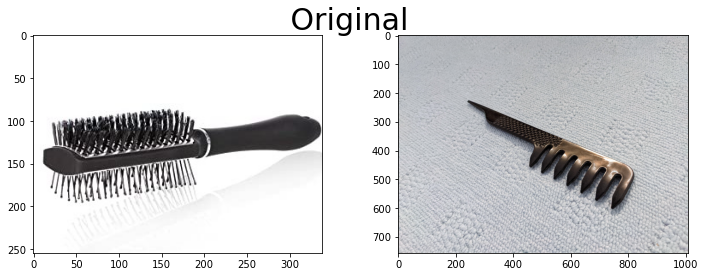

In [10]:
imgB = cv.imread("Data/Buerste/Buerste_8.jpg")
imgK = cv.imread("Data/Kamm/Kamm_103.jpg")

#img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# plot:
plt.figure()
# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(12,4)) 
f.suptitle(' Original ', fontsize=30)
axarr[0].imshow(imgB)
axarr[1].imshow(imgK)

<Figure size 432x288 with 0 Axes>

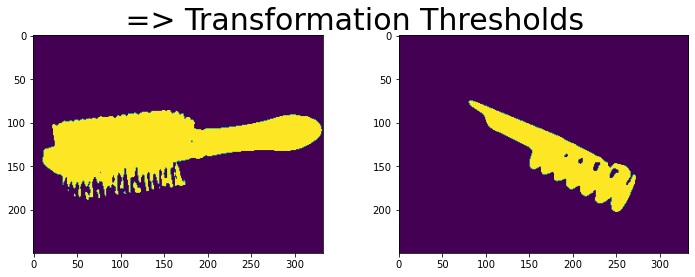

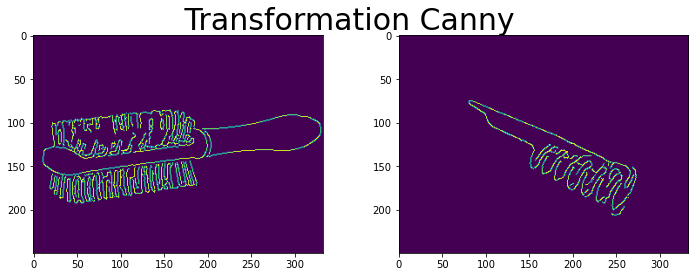

In [11]:
# Image transformation:
def show_treshImg(img):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    rgray = cv.resize(gray,(333,250))                                   # Width x Height
    brgray = cv.GaussianBlur(rgray,(9,9),0,0)
    T = cv.threshold(brgray,0,cv.THRESH_BINARY,cv.THRESH_OTSU)
    _,treshImg = cv.threshold(brgray, T[0]+10, 255, cv.THRESH_BINARY_INV)
    cbrgray = cv.Canny(brgray,T[0],0)                                  # canny doesn't work well for contour detection
    return treshImg, cbrgray

treshImgB, cbrgrayB = show_treshImg(imgB)
treshImgK, cbrgrayK = show_treshImg(imgK)

# plot:
plt.figure()
# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(12,4)) 
f.suptitle(' => Transformation Thresholds', fontsize=30)
axarr[0].imshow(treshImgB)
axarr[1].imshow(treshImgK)

f, axarr = plt.subplots(1,2,figsize=(12,4)) 
f.suptitle(' Transformation Canny ', fontsize=30)
axarr[0].imshow(cbrgrayB)
axarr[1].imshow(cbrgrayK)

### Feature detection with Thresholds:

# ------------------------
#  Buerste
cx:  145
cy:  125
perimeter:  1350.5899621248245
Length/width: (322.125732421875, 92.60660552978516)
Steiner:  26.1725046566048
aspect_ratio:  3.4784314853033824

# ------------------------
#  Kamm
cx:  190
cy:  142
perimeter:  611.026472568512
Length/width: (51.87677764892578, 212.87364196777344)
Steiner:  21.540659228538015
aspect_ratio:  4.1034476622350775

### Feature detection with Canny:

# ------------------------
#  Buerste
cx:  161
cy:  103
perimeter:  251.92387986183167
Length/width: (17.91948890686035, 37.154170989990234)
Steiner:  2.23606797749979
aspect_ratio:  2.0733945696278213

# ------------------------
#  Kamm
cx:  153
cy:  112
perimeter:  646.3818107843399
Length/width: (45.94078826904297, 177.3684844970703)
Steiner:  16.0312195418814
aspect_ratio:  3.860806293926598


<Figure size 432x288 with 0 Axes>

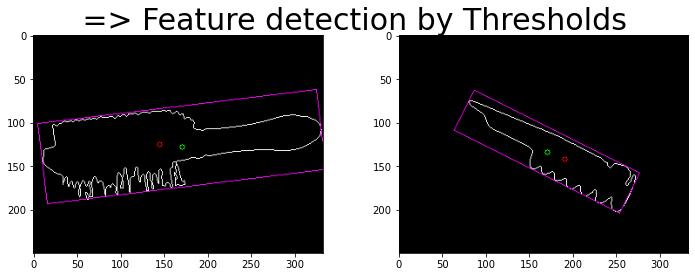

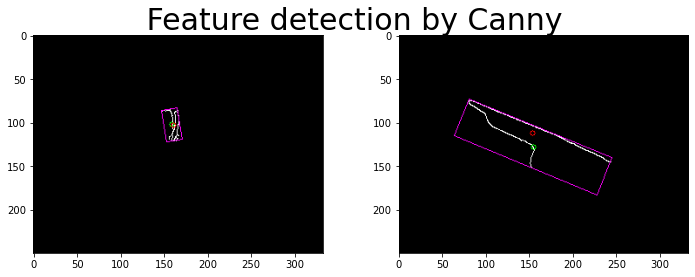

In [12]:
def featureImgDetect(treshImg, catName):
    print("\n# ------------------------\n# ", catName)
    contours,_ = cv.findContours(treshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    cnt = contours[len(contours)-1]
    M = cv.moments(cnt)

    cx = int(M['m10']/M['m00'])                                           # Centroid!!!!!!!!!!!!!
    cy = int(M['m01']/M['m00'])
    print('cx: ',cx)
    print('cy: ',cy)

    perimeter = cv.arcLength(cnt,True)                                    # Perimeter !!!!!!!!!!
    print('perimeter: ',perimeter)

    # Find the rotated rectangles
    minRect = [None]*len(contours)                                        #  Contour !!!!!!!!!!
    for j, c in enumerate(contours):
        minRect[j] = cv.minAreaRect(c)

    mx = int(minRect[len(minRect)-1][0][0])
    my = int(minRect[len(minRect)-1][0][1])

    #print(minRect[len(minRect)-1])


    drawing = np.zeros((treshImg.shape[0], treshImg.shape[1], 3), dtype=np.uint8)
    cv.drawContours(drawing, contours, len(contours)-1, (255, 255, 255)) # Contour

    box = cv.boxPoints(minRect[len(minRect)-1])
    box = np.intp(box)
    cv.drawContours(drawing, [box], 0, (255, 0, 255))                    # Box(lila)
    cv.circle(drawing, (mx, my), 3, (0, 255, 0))                         # Mittelpunkt(grün) der Box
    cv.circle(drawing, (cx, cy), 3, (255, 0, 0))                         # Schwerpunkt(rot) der Fläche der Kontur

    print('Length/width:', minRect[len(minRect)-1][1])

    stein = np.sqrt(((mx-cx)**2)+((my-cy)**2))
    print('Steiner: ', stein)

    ratio = max(minRect[len(minRect)-1][1])/min(minRect[len(minRect)-1][1])
    print('aspect_ratio: ',ratio)
    return drawing
#___________________________________________________________________________

print("### Feature detection with Thresholds:")
drwB = featureImgDetect(treshImgB, 'Buerste')
drwK = featureImgDetect(treshImgK, 'Kamm')

print("\n### Feature detection with Canny:")
drwCB = featureImgDetect(cbrgrayB, 'Buerste')
drwCK = featureImgDetect(cbrgrayK, 'Kamm')

# plot:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(12,4)) 
f.suptitle(' => Feature detection by Thresholds', fontsize=30)
axarr[0].imshow(drwB)
axarr[1].imshow(drwK)

f, axarr = plt.subplots(1,2,figsize=(12,4)) 
f.suptitle(' Feature detection by Canny', fontsize=30)
axarr[0].imshow(drwCB)
axarr[1].imshow(drwCK)

## 2. Feature detection for training

In [13]:
## Direction:
inputPathBuerste = "Data/Buerste"
inputPathKamm = "Data/Kamm"

DirBuerste = os.listdir(inputPathBuerste);
DirKamm = os.listdir(inputPathKamm);

## relevant feature outputs:
#_____________________________________________________

length = [None]*(len(DirBuerste) + len(DirKamm))
width = [None]*(len(DirBuerste) + len(DirKamm))
aspect_ratio = [None]*(len(DirBuerste) + len(DirKamm))
perimeter = [None]*(len(DirBuerste) + len(DirKamm))
steiner = [None]*(len(DirBuerste) + len(DirKamm))
thing = [None]*(len(DirBuerste) + len(DirKamm))
fname = [None]*(len(DirBuerste) + len(DirKamm))

In [14]:
## Feature detection for : 
#_____________________________________________________Buerste

for i in range (0, len(DirBuerste)):
    print("\n# ------------------------\n# ", inputPathBuerste + '/' + DirBuerste[i])
    img = cv.imread(inputPathBuerste + '/' + DirBuerste[i])
    
    # Image transformation
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    rgray = cv.resize(gray,(333,250))   #Breite x Höhe
    brgray = cv.GaussianBlur(rgray,(9,9),0,0)
    T = cv.threshold(brgray,0,cv.THRESH_BINARY,cv.THRESH_OTSU)
    _,treshImg = cv.threshold(brgray, T[0]+10, 255, cv.THRESH_BINARY_INV)
    
    
    # Feature
    contours,_ = cv.findContours(treshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    cnt = contours[len(contours)-1]
    M = cv.moments(cnt)

    cx = int(M['m10']/M['m00'])                                 # Centroid !!!!!!!!!!!!!
    cy = int(M['m01']/M['m00'])
    print('cx: ',cx)
    print('cy: ',cy)

    perim = cv.arcLength(cnt,True)                              # Perimeter !!!!!!!!!!
    print('perimeter: ',perim)

    # Find the rotated rectangles
    minRect = [None]*len(contours)                              # Contours !!!!!!!!!!
    for j, c in enumerate(contours):
        minRect[j] = cv.minAreaRect(c)
    print('length/width: {} / {}'.format(max(minRect[len(minRect)-1][1]),min(minRect[len(minRect)-1][1])))
    
    mx = int(minRect[len(minRect)-1][0][0])
    my = int(minRect[len(minRect)-1][0][1])
    stein = np.sqrt(((mx-cx)**2)+((my-cy)**2))
    print('Steiner: ', stein)
        
    ratio = max(minRect[len(minRect)-1][1])/min(minRect[len(minRect)-1][1])
    print('aspect_ratio: ',ratio)
    
    # Writing Data
    length[i] = max(minRect[len(minRect)-1][1])
    width[i] = min(minRect[len(minRect)-1][1])
    aspect_ratio[i] = ratio
    perimeter[i] = cv.arcLength(cnt,True)
    steiner[i] = stein
    thing[i] = "Buerste"
    fname[i] = DirBuerste[i]


## Feature detection for : 
#_____________________________________________________Kamm

for i in range (0, len(DirKamm)):
    print("\n# ------------------------\n# ", inputPathKamm + '/' + DirKamm[i])
    img = cv.imread(inputPathKamm + '/' + DirKamm[i])
    
    # Image transformation
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    rgray = cv.resize(gray,(333,250))   #Breite x Höhe
    brgray = cv.GaussianBlur(rgray,(9,9),0,0)
    T = cv.threshold(brgray,0,cv.THRESH_BINARY,cv.THRESH_OTSU)
    _,treshImg = cv.threshold(brgray, T[0]+10, 255, cv.THRESH_BINARY_INV)
    
    # Feature
    contours,_ = cv.findContours(treshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    cnt = contours[len(contours)-1]
    M = cv.moments(cnt)

    cx = int(M['m10']/M['m00'])                                  # Centroid !!!!!!!!!!!!!
    cy = int(M['m01']/M['m00'])
    print('cx: ',cx)
    print('cy: ',cy)

    perim = cv.arcLength(cnt,True)                              # Perimeter !!!!!!!!!!
    print('perimeter: ',perim)

    # Find the rotated rectangles
    minRect = [None]*len(contours)                              # Contours !!!!!!!!!!
    for j, c in enumerate(contours):
        minRect[j] = cv.minAreaRect(c)
    print('length/width: {} / {}'.format(max(minRect[len(minRect)-1][1]),min(minRect[len(minRect)-1][1])))    
    
    mx = int(minRect[len(minRect)-1][0][0])
    my = int(minRect[len(minRect)-1][0][1])
    stein = np.sqrt(((mx-cx)**2)+((my-cy)**2))
    print('Steiner: ', stein)
    
    ratio = max(minRect[len(minRect)-1][1])/min(minRect[len(minRect)-1][1])
    print('aspect_ratio: ',ratio)
    
    # Writing Data
    length[i + len(DirBuerste)] = max(minRect[len(minRect)-1][1])
    width[i + len(DirBuerste)] = min(minRect[len(minRect)-1][1])
    aspect_ratio[i + len(DirBuerste)] = ratio
    perimeter[i + len(DirBuerste)] = cv.arcLength(cnt,True)
    steiner[i + len(DirBuerste)] = stein
    thing[i + len(DirBuerste)] = "Kamm"
    fname[i + len(DirBuerste)] = DirKamm[i]
    
#_____________________________________________________
#_____________________________________________________End
print("\n# ------------------------End ")


# ------------------------
#  Data/Buerste/Buerste_1.jpg
cx:  205
cy:  156
perimeter:  886.1879416704178
length/width: 347.0486755371094 / 100.687255859375
Steiner:  67.67569726275453
aspect_ratio:  3.446798431191882

# ------------------------
#  Data/Buerste/Buerste_10.jpg
cx:  109
cy:  59
perimeter:  45.698484659194946
length/width: 19.558391571044922 / 5.7008771896362305
Steiner:  0.0
aspect_ratio:  3.430768795826828

# ------------------------
#  Data/Buerste/Buerste_100.jpg
cx:  188
cy:  131
perimeter:  826.6416969299316
length/width: 241.0 / 84.0
Steiner:  25.179356624028344
aspect_ratio:  2.869047619047619

# ------------------------
#  Data/Buerste/Buerste_101.jpg
cx:  206
cy:  131
perimeter:  836.3401809930801
length/width: 258.9422912597656 / 87.69088745117188
Steiner:  24.08318915758459
aspect_ratio:  2.952898514158043

# ------------------------
#  Data/Buerste/Buerste_102.jpg
cx:  176
cy:  137
perimeter:  918.4234414100647
length/width: 262.40338134765625 / 100.215332031

cx:  135
cy:  117
perimeter:  1006.0630503892899
length/width: 337.96551513671875 / 95.07601165771484
Steiner:  36.68787265568828
aspect_ratio:  3.5546875520340033

# ------------------------
#  Data/Buerste/Buerste_137.jpg
cx:  140
cy:  162
perimeter:  563.2935007810593
length/width: 235.72262573242188 / 48.96074295043945
Steiner:  24.413111231467404
aspect_ratio:  4.814523055155275

# ------------------------
#  Data/Buerste/Buerste_138.jpg
cx:  146
cy:  122
perimeter:  538.3502861261368
length/width: 230.492431640625 / 40.475765228271484
Steiner:  20.396078054371138
aspect_ratio:  5.6945787273128765

# ------------------------
#  Data/Buerste/Buerste_139.jpg
cx:  130
cy:  123
perimeter:  547.6366437673569
length/width: 230.60023498535156 / 44.879859924316406
Steiner:  21.470910553583888
aspect_ratio:  5.138167440233248

# ------------------------
#  Data/Buerste/Buerste_14.jpg
cx:  183
cy:  120
perimeter:  1307.5504170656204
length/width: 363.4091491699219 / 144.2447052001953
Steine

cx:  208
cy:  122
perimeter:  679.5289984941483
length/width: 243.94326782226562 / 95.41284942626953
Steiner:  29.120439557122072
aspect_ratio:  2.5567129510242044

# ------------------------
#  Data/Buerste/Buerste_37.jpg
cx:  186
cy:  110
perimeter:  1084.0285613536835
length/width: 348.8153991699219 / 78.46858215332031
Steiner:  24.73863375370596
aspect_ratio:  4.445287395258003

# ------------------------
#  Data/Buerste/Buerste_38.jpg
cx:  177
cy:  125
perimeter:  1857.6854145526886
length/width: 326.28173828125 / 135.55831909179688
Steiner:  8.54400374531753
aspect_ratio:  2.4069473601269706

# ------------------------
#  Data/Buerste/Buerste_39.jpg
cx:  153
cy:  137
perimeter:  833.1168744564056
length/width: 362.74578857421875 / 68.58935546875
Steiner:  19.209372712298546
aspect_ratio:  5.2886601148991605

# ------------------------
#  Data/Buerste/Buerste_4.jpg
cx:  153
cy:  117
perimeter:  1254.4894561767578
length/width: 318.9574279785156 / 104.11609649658203
Steiner:  23.25

cx:  32
cy:  31
perimeter:  407.13708233833313
length/width: 116.0 / 111.0
Steiner:  35.38361202590826
aspect_ratio:  1.045045045045045

# ------------------------
#  Data/Buerste/Buerste_73.jpg
cx:  182
cy:  115
perimeter:  814.3717039823532
length/width: 311.266357421875 / 61.05414581298828
Steiner:  18.867962264113206
aspect_ratio:  5.098201821958143

# ------------------------
#  Data/Buerste/Buerste_74.jpg
cx:  178
cy:  134
perimeter:  975.6437835693359
length/width: 314.2376708984375 / 116.48704528808594
Steiner:  35.22782990761707
aspect_ratio:  2.6976190367031063

# ------------------------
#  Data/Buerste/Buerste_75.jpg
cx:  189
cy:  130
perimeter:  1449.4255279302597
length/width: 347.73199462890625 / 129.64981079101562
Steiner:  35.014282800023196
aspect_ratio:  2.682086402651373

# ------------------------
#  Data/Buerste/Buerste_76.jpg
cx:  201
cy:  124
perimeter:  692.6000670194626
length/width: 264.99993896484375 / 86.99998474121094
Steiner:  38.0
aspect_ratio:  3.045976

length/width: 234.10667419433594 / 50.389991760253906
Steiner:  9.219544457292887
aspect_ratio:  4.6458962586890555

# ------------------------
#  Data/Kamm/Kamm_115.jpg
cx:  211
cy:  154
perimeter:  1001.269113779068
length/width: 246.67503356933594 / 53.026668548583984
Steiner:  11.045361017187261
aspect_ratio:  4.65190517000569

# ------------------------
#  Data/Kamm/Kamm_116.jpg
cx:  103
cy:  172
perimeter:  1353.886424779892
length/width: 278.99993896484375 / 199.99996948242188
Steiner:  43.266615305567875
aspect_ratio:  1.394999907684312

# ------------------------
#  Data/Kamm/Kamm_117.jpg
cx:  113
cy:  177
perimeter:  1355.6610298156738
length/width: 297.0 / 156.0
Steiner:  35.510561809129406
aspect_ratio:  1.9038461538461537

# ------------------------
#  Data/Kamm/Kamm_118.jpg
cx:  152
cy:  112
perimeter:  850.7493427991867
length/width: 321.76409912109375 / 90.08938598632812
Steiner:  18.439088914585774
aspect_ratio:  3.571609414342377

# ------------------------
#  Data/Ka

perimeter:  1434.54119181633
length/width: 327.2054138183594 / 71.44974517822266
Steiner:  18.384776310850235
aspect_ratio:  4.579518275428211

# ------------------------
#  Data/Kamm/Kamm_19.jpg
cx:  177
cy:  116
perimeter:  1023.1686079502106
length/width: 308.0217590332031 / 75.11741638183594
Steiner:  6.4031242374328485
aspect_ratio:  4.100537183913124

# ------------------------
#  Data/Kamm/Kamm_2.jpg
cx:  193
cy:  118
perimeter:  879.1168727874756
length/width: 344.0538330078125 / 91.90511322021484
Steiner:  30.0
aspect_ratio:  3.7435766188919364

# ------------------------
#  Data/Kamm/Kamm_20.jpg
cx:  172
cy:  127
perimeter:  763.1412637233734
length/width: 338.67791748046875 / 42.91527557373047
Steiner:  8.602325267042627
aspect_ratio:  7.891780093514816

# ------------------------
#  Data/Kamm/Kamm_21.jpg
cx:  143
cy:  125
perimeter:  905.5087928771973
length/width: 327.74957275390625 / 71.67851257324219
Steiner:  19.026297590440446
aspect_ratio:  4.572494056974282

# ------

cx:  208
cy:  135
perimeter:  670.75230717659
length/width: 307.14886474609375 / 36.10893630981445
Steiner:  38.47076812334269
aspect_ratio:  8.506173156438571

# ------------------------
#  Data/Kamm/Kamm_55.jpg
cx:  166
cy:  129
perimeter:  818.0487705469131
length/width: 332.0 / 88.0
Steiner:  1.0
aspect_ratio:  3.772727272727273

# ------------------------
#  Data/Kamm/Kamm_56.jpg
cx:  160
cy:  107
perimeter:  2906.075576543808
length/width: 379.0437316894531 / 71.43304443359375
Steiner:  18.027756377319946
aspect_ratio:  5.306279953416003

# ------------------------
#  Data/Kamm/Kamm_57.jpg
cx:  184
cy:  126
perimeter:  866.0041763782501
length/width: 351.5470886230469 / 84.97743225097656
Steiner:  22.360679774997898
aspect_ratio:  4.136946472856114

# ------------------------
#  Data/Kamm/Kamm_58.jpg
cx:  165
cy:  112
perimeter:  453.49747383594513
length/width: 195.0 / 40.0
Steiner:  3.1622776601683795
aspect_ratio:  4.875

# ------------------------
#  Data/Kamm/Kamm_59.jpg
cx:

length/width: 2.0 / 1.0
Steiner:  0.0
aspect_ratio:  2.0

# ------------------------
#  Data/Kamm/Kamm_94.jpg
cx:  109
cy:  162
perimeter:  1605.6610292196274
length/width: 281.0 / 210.0
Steiner:  35.84689665786984
aspect_ratio:  1.338095238095238

# ------------------------
#  Data/Kamm/Kamm_95.jpg
cx:  169
cy:  126
perimeter:  563.362478017807
length/width: 200.83807373046875 / 42.86483383178711
Steiner:  25.317977802344327
aspect_ratio:  4.685380900311202

# ------------------------
#  Data/Kamm/Kamm_96.jpg
cx:  161
cy:  133
perimeter:  608.6589416265488
length/width: 217.8603057861328 / 48.87507247924805
Steiner:  26.0
aspect_ratio:  4.457493252386163

# ------------------------
#  Data/Kamm/Kamm_97.jpg
cx:  191
cy:  150
perimeter:  535.0853472948074
length/width: 191.10951232910156 / 51.37699890136719
Steiner:  23.40939982143925
aspect_ratio:  3.7197484558409264

# ------------------------
#  Data/Kamm/Kamm_98.jpg
cx:  165
cy:  112
perimeter:  453.49747383594513
length/width: 195.

# 3. Feature csv-file

In [15]:
# Create csv file for Training:
#_____________________________________________________

df = {'length': length, 'width': width, 'aspect_ratio': aspect_ratio, 'perimeter': perimeter, 'steiner': steiner, 'thing': thing, 'File' : fname }
dfOut = pd.DataFrame(data=df)

# Only for first run needed: 'DATA_Buerste_Kamm_Training.csv'
dfOut.to_csv('DATA_Buerste_Kamm_Training_2.csv', index=False)

print("\n# ------------------------csv-file created ")


# ------------------------csv-file created 


In [16]:
dfOut.head()

,length,width,aspect_ratio,perimeter,steiner,thing,File
0,347.048676,100.687256,3.446798,886.187942,67.675697,Buerste,Buerste_1.jpg
1,19.558392,5.700877,3.430769,45.698485,0.000000,Buerste,Buerste_10.jpg
2,241.000000,84.000000,2.869048,826.641697,25.179357,Buerste,Buerste_100.jpg
3,258.942291,87.690887,2.952899,836.340181,24.083189,Buerste,Buerste_101.jpg
4,262.403381,100.215332,2.618396,918.423441,29.410882,Buerste,Buerste_102.jpg
